<i>## Comments will be provided using this format. Key takeaway: groups are encouraged to change the formatting, but not the structure. Groups are also allowed to create additional notebooks - for instance, create one notebook for data exploration, and one notebook for each preprocessing-modelling-evaluation pipeline -, but must strive to keep an unified style across notebooks.</i>

#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Notebook Title`

#### Group:
- `Group member #1`
- `(...)`
- `Group member #5`

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Data Understanding](#P1)
- [2. General Data Preparation](#P2) 
- [3. Multilabel Classification (Information Requirement 3311)](#P3)
    - [3.1 Specific Data Preparation](#P31)
    - [3.2 Model Implementation](#P32)
    - [3.3 Model Evaluation](#P3n)
- [4. Sentiment Analysis (Information Requirement 3312)](#P4)
    - [4.1 Specific Data Preparation](#P41)
    - [4.2 Model Implementation](#P42)
    - [4.3 Model Evaluation](#P43)
- [...]
- [N. Additional Tasks (Information Requirements 332n)](#Pn)
    - [N.1 Specific Data Preparation](#Pn1)
    - [N.2 Model Implementation](#Pn2)
    - [N.3 Model Evaluation](#Pn3)

<i>## Note that the notebook structure differs from the report: instead of following the CRISP-DM phases and then specifying the different problems inside the phases, the notebook is structured by problem, with the CRISP-DM phases being defined for each specific problem.

In [1]:
%reload_ext autoreload
%autoreload 2

In [61]:
## All imports must be concentrated on a cell that immediately follow the table of contents
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import Text_preprocessing_functions
import Graphs

#without truncation
pd.set_option('display.max_colwidth', None)

<font color='#BFD72F' size=5>1. Data Understanding</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

<i>## Imports.</i>

In [59]:
reviews=pd.read_csv('data/reviews_initial_preproc.csv')
reviews['Review'].fillna('', inplace=True)
restaurants=pd.read_csv('data/restaurants_initial_preproc.csv') 
restaurants['Collections'].fillna('[]', inplace=True)
restaurants['Collections'] = restaurants['Collections'].apply(lambda x: eval(x))
restaurants['Cuisines'] = restaurants['Cuisines'].apply(lambda x: eval(x))

## Restaurant data exploration


In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9962 non-null   object 
 1   Reviewer    9962 non-null   object 
 2   Review      9962 non-null   object 
 3   Rating      9962 non-null   float64
 4   Time        9962 non-null   object 
 5   Pictures    9962 non-null   int64  
 6   N_reviews   9956 non-null   float64
 7   Followers   8384 non-null   float64
 8   Month       9962 non-null   int64  
 9   Year        9962 non-null   int64  
 10  Weekend     9962 non-null   int64  
 11  Post_Meal   9962 non-null   int64  
 12  msg_len     9962 non-null   int64  
 13  nr_sents    9962 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 1.1+ MB


In [17]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Cost           105 non-null    int64 
 2   Collections    105 non-null    object
 3   Cuisines       105 non-null    object
 4   N_collections  105 non-null    int64 
 5   open time      105 non-null    int64 
 6   closing time   105 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.9+ KB


In [5]:
restaurants.describe()

,Cost,N_collections,open time,closing time
count,105.000000,105.000000,105.000000,105.000000
mean,861.428571,1.009524,11.028571,18.971429
std,510.149730,1.451095,2.826581,8.471056
min,150.000000,0.000000,1.000000,1.000000
25%,500.000000,0.000000,11.000000,22.000000
50%,700.000000,0.000000,12.000000,23.000000
75%,1200.000000,1.000000,12.000000,23.000000
max,2800.000000,7.000000,24.000000,24.000000


In [6]:
restaurants

,Name,Cost,Collections,Cuisines,N_collections,open time,closing time
0,Beyond Flavours,800,"[Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings]","[Chinese, Continental, Kebab, European, South Indian, North Indian]",6,12,23
1,Paradise,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",1,11,23
2,Flechazo,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]",2,11,23
3,Shah Ghouse Hotel & Restaurant,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beverages]",1,12,2
4,Over The Moon Brew Company,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest]","[Asian, Continental, North Indian, Chinese, Mediterranean]",5,12,24
...,...,...,...,...,...,...,...
100,IndiBlaze,600,[],"[Fast Food, Salad]",0,11,23
101,Sweet Basket,200,[],"[Bakery, Mithai]",0,10,22
102,Angaara Counts 3,500,[],"[North Indian, Biryani, Chinese]",0,12,23
103,Wich Please,250,[],[Fast Food],0,8,24


In [7]:
#there is no restaunt duplicates
restaurants['Name'].nunique()

105

In [8]:
cuisines_exploded = restaurants['Cuisines'].explode().explode()
collections_exploded = restaurants['Collections'].explode().explode()

In [9]:
"""restaurant_agg = restaurants_exploded.groupby(['Cuisines', 'Collections']).agg(
    total_cost=('Cost', 'mean'), # Sum of 'Cost'
    count=('Cost', 'count')     # Count of restaurants
)

# Sort the result by 'total_cost' in descending order and get the top 10 rows
restaurant_agg.sort_values(by='total_cost', ascending=False).head(10)"""

"restaurant_agg = restaurants_exploded.groupby(['Cuisines', 'Collections']).agg(\n    total_cost=('Cost', 'mean'), # Sum of 'Cost'\n    count=('Cost', 'count')     # Count of restaurants\n)\n\n# Sort the result by 'total_cost' in descending order and get the top 10 rows\nrestaurant_agg.sort_values(by='total_cost', ascending=False).head(10)"

In [10]:
"""restaurants_exploded.groupby(['Collections']).agg(
    mean_cost=('Cost', 'mean'),   # Calculate the mean of 'Cost'
    count=('Cost', 'count') ).sort_values(by='mean_cost', ascending=False).head(5)"""

"restaurants_exploded.groupby(['Collections']).agg(\n    mean_cost=('Cost', 'mean'),   # Calculate the mean of 'Cost'\n    count=('Cost', 'count') ).sort_values(by='mean_cost', ascending=False).head(5)"

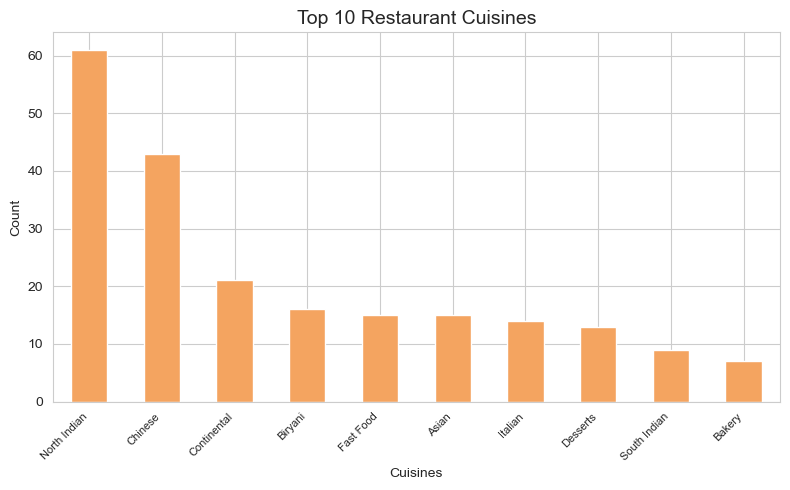

In [11]:
plot_top10_bar(cuisines_exploded)

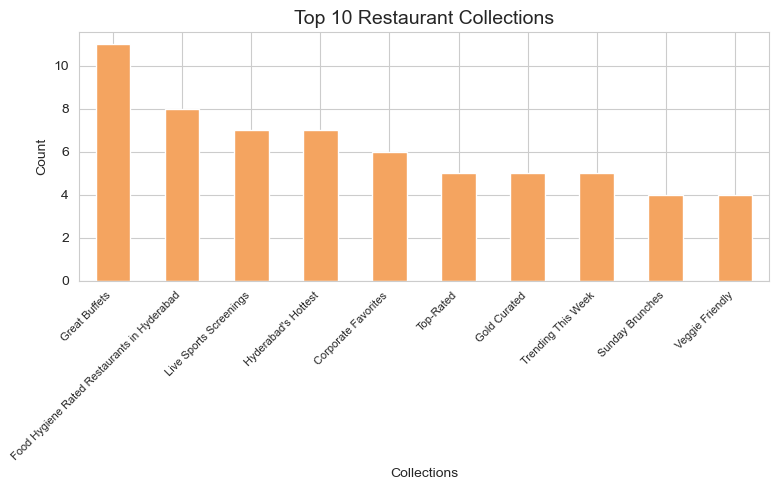

In [12]:
plot_top10_bar(collections_exploded)

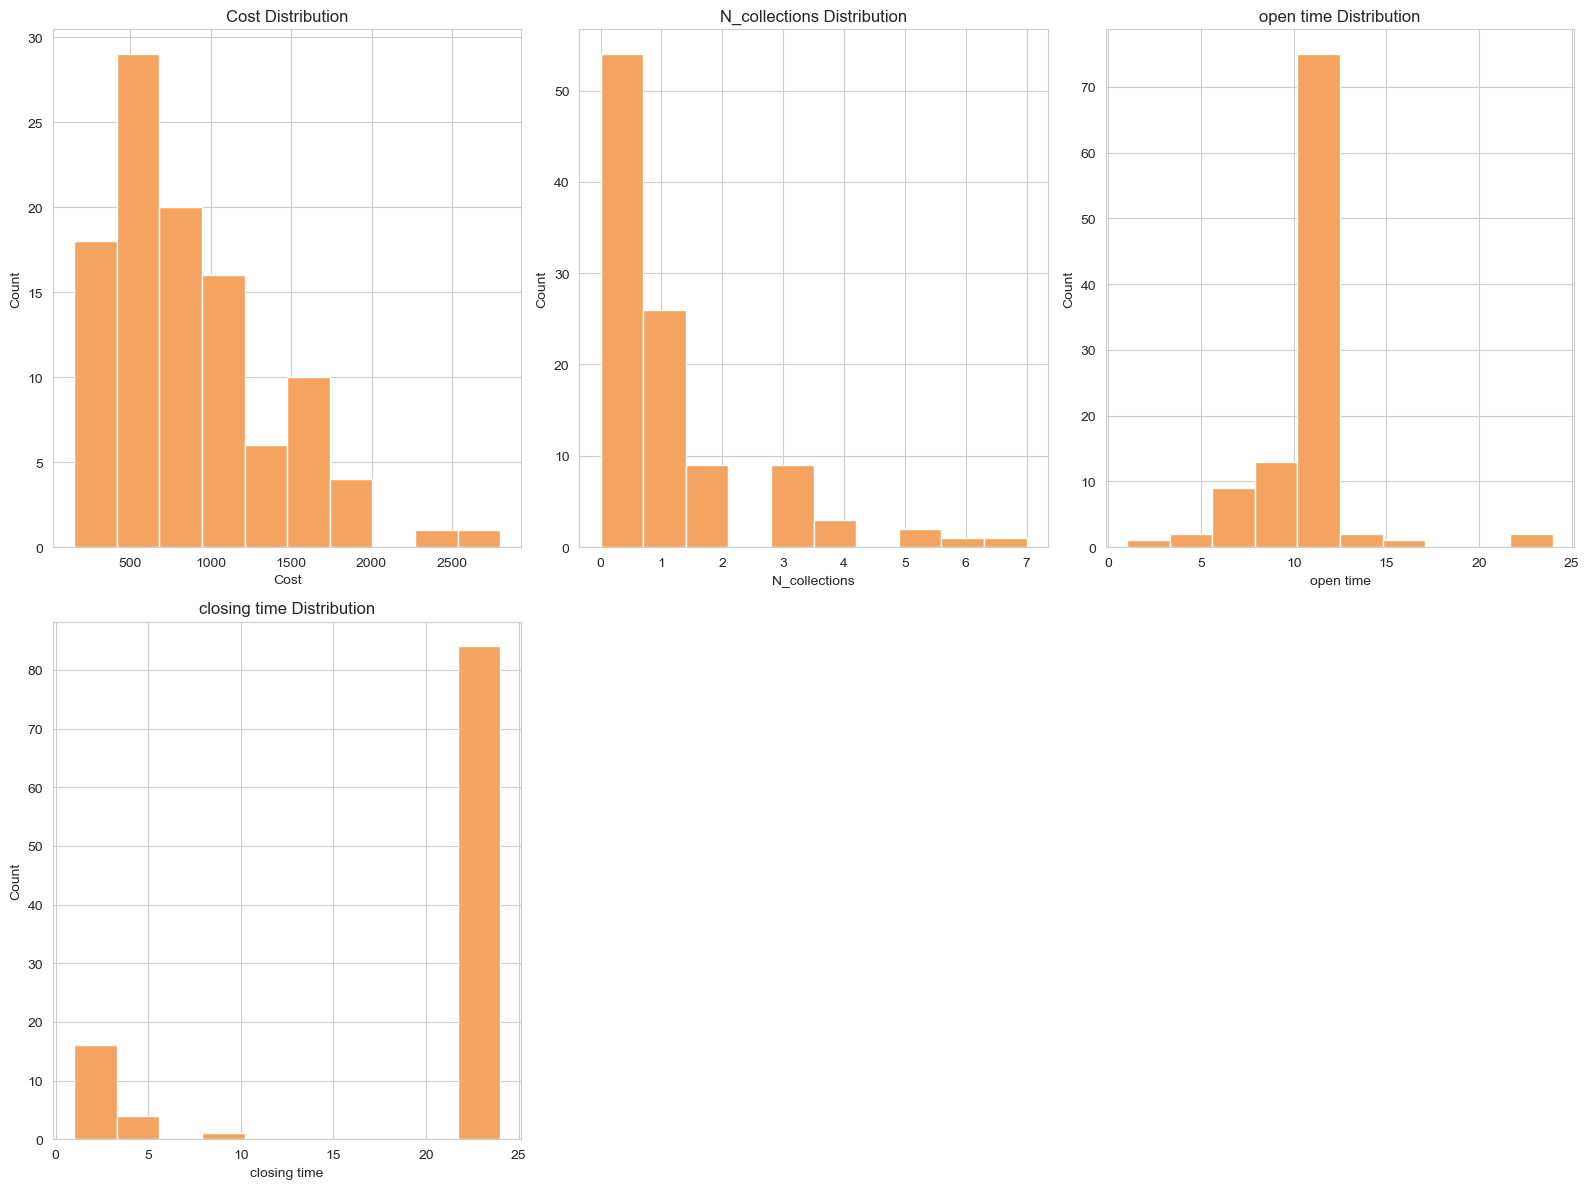

In [27]:
plot_histograms(restaurants, ['Cost','N_collections','open time','closing time'])

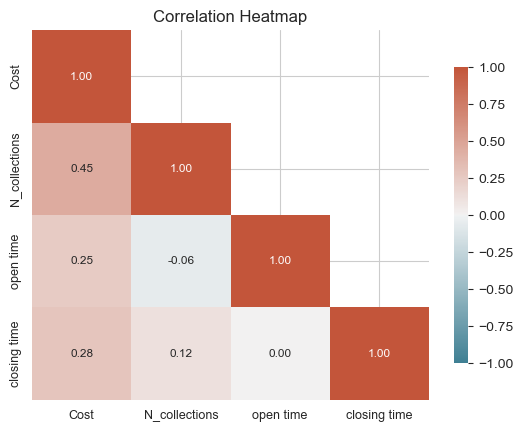

In [14]:
plot_heatmap(restaurants)

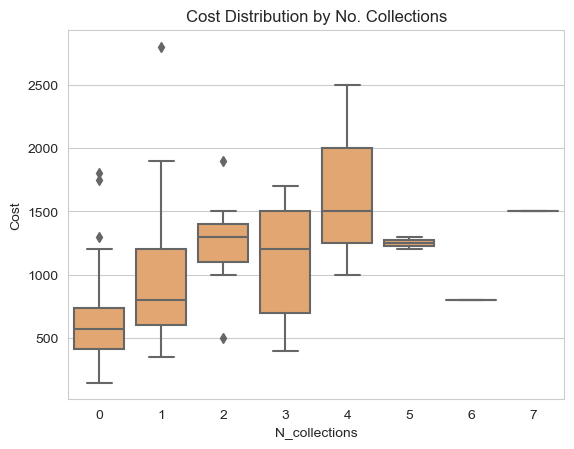

In [15]:
sns.boxplot(restaurants, x='N_collections', y='Cost', color='sandybrown').set_title('Cost Distribution by No. Collections')
plt.show()

## Reviews data exploration

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9962 non-null   object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   float64
 4   Time        9962 non-null   object 
 5   Pictures    9962 non-null   int64  
 6   N_reviews   9956 non-null   float64
 7   Followers   8384 non-null   float64
 8   Month       9962 non-null   int64  
 9   Year        9962 non-null   int64  
 10  Weekend     9962 non-null   int64  
 11  Post_Meal   9962 non-null   int64  
 12  msg_len     9962 non-null   int64  
 13  sents       9962 non-null   object 
 14  nr_sents    9962 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.1+ MB


In [17]:
reviews.describe()

,Rating,Pictures,N_reviews,Followers,Month,Year,Weekend,Post_Meal,msg_len,nr_sents
count,9962.000000,9962.000000,9956.000000,8384.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000,9962.000000
mean,3.601185,0.751456,23.959321,193.672233,6.017868,2018.452118,0.357759,0.538446,281.262899,4.065248
std,1.483453,2.574863,50.601613,671.374116,3.159464,0.562494,0.479365,0.498545,341.581888,4.235389
min,1.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,0.000000,1.000000,2.000000,4.000000,2018.000000,0.000000,0.000000,145.000000,1.000000
50%,4.000000,0.000000,4.000000,13.000000,5.000000,2018.000000,0.000000,1.000000,190.000000,3.000000
75%,5.000000,0.000000,22.000000,92.000000,8.000000,2019.000000,1.000000,1.000000,323.000000,5.000000
max,5.000000,64.000000,1031.000000,13410.000000,12.000000,2019.000000,1.000000,1.000000,5247.000000,66.000000


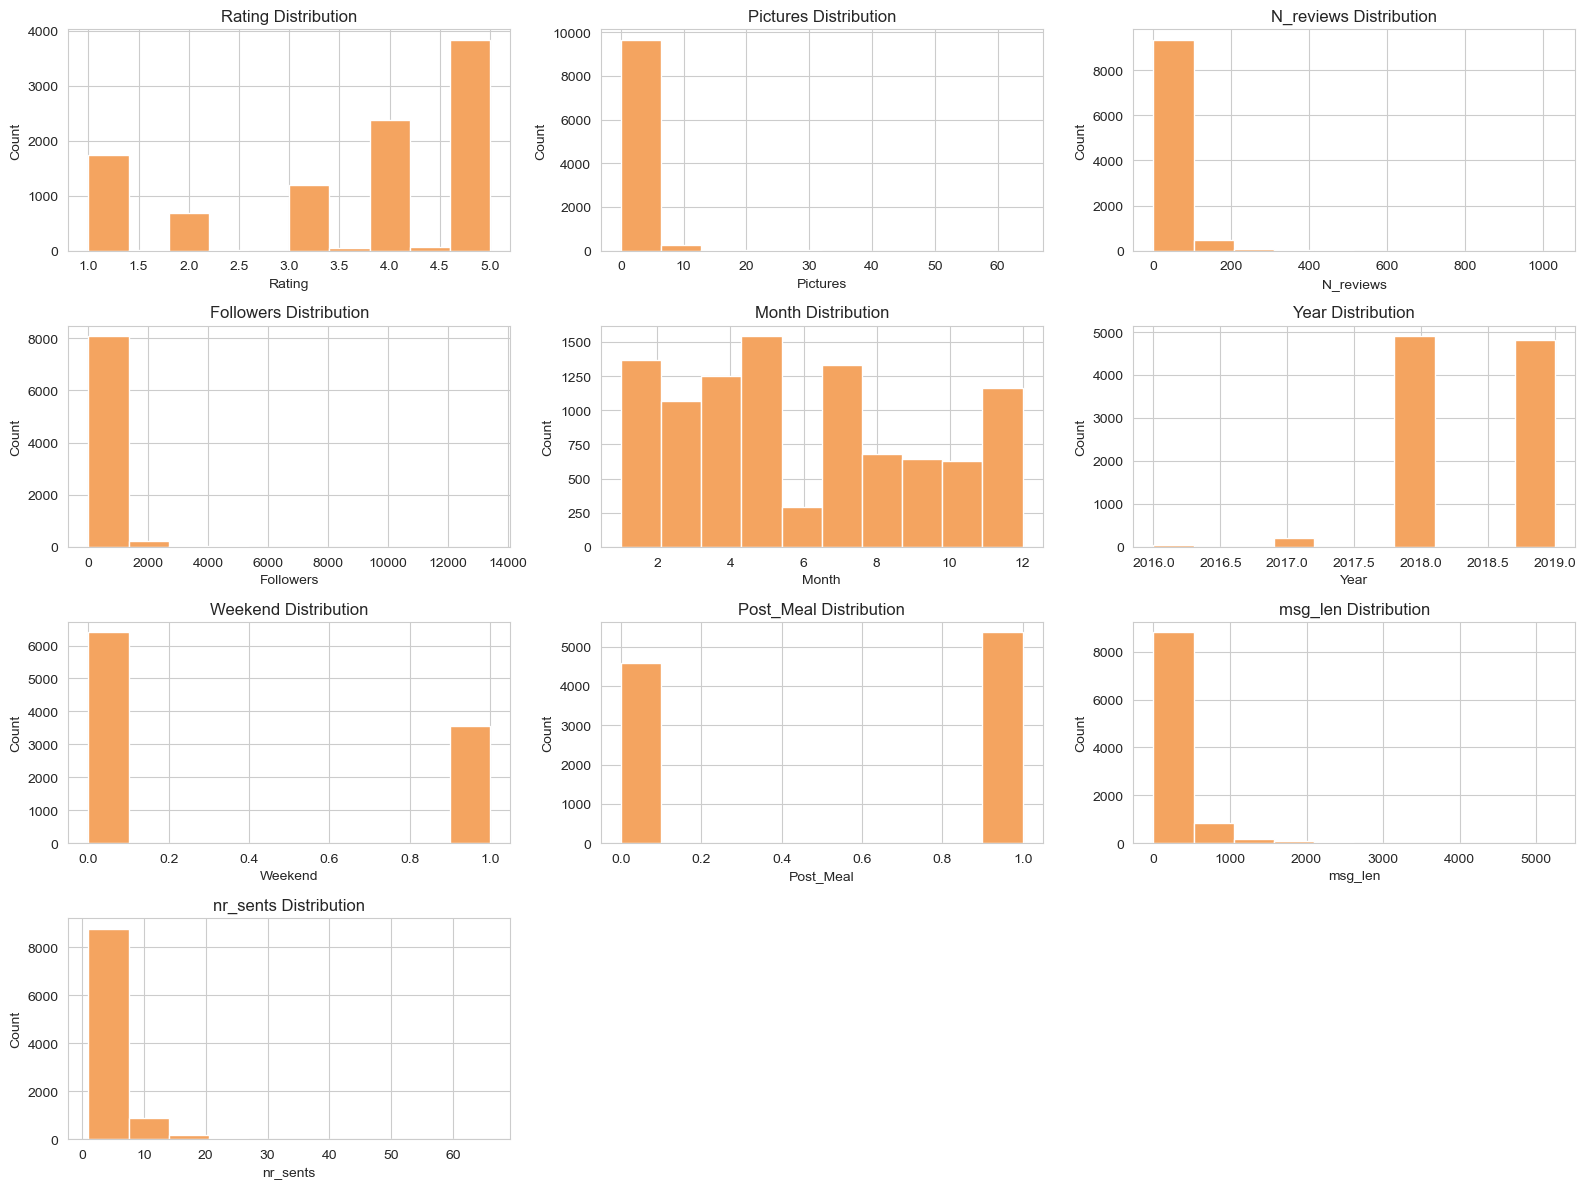

In [18]:
plot_histograms(reviews, ['Rating','Pictures','N_reviews','Followers','Month','Year','Weekend','Post_Meal','msg_len','nr_sents'])

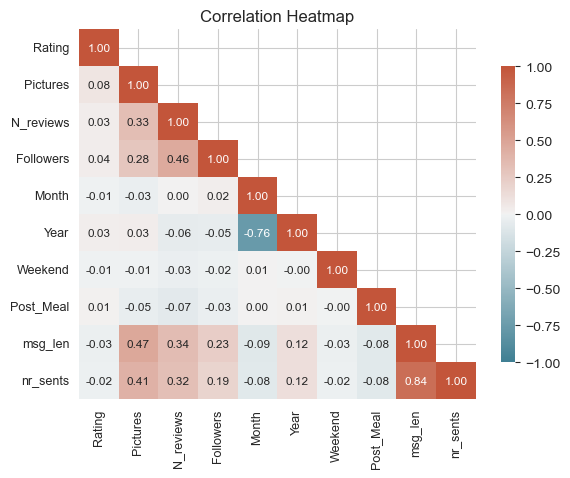

In [19]:
plot_heatmap(reviews)

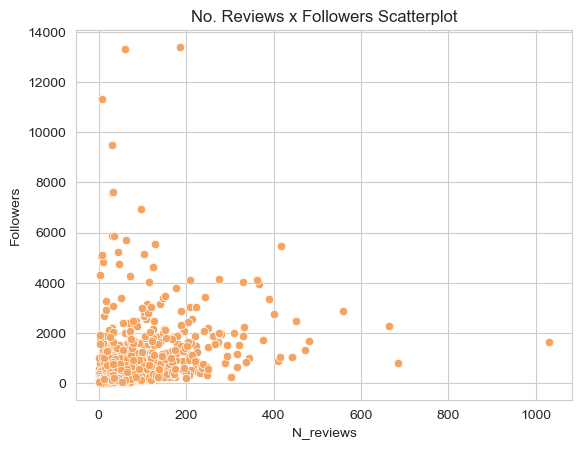

In [20]:
sns.scatterplot(reviews, x='N_reviews', y='Followers', c='sandybrown').set_title('No. Reviews x Followers Scatterplot')
plt.show()

In [21]:
print('Top Reviewers')
reviews['Reviewer'].value_counts().sort_values(ascending=False)

Top Reviewers


Parijat Ray              13
Ankita                   13
Kiran                    12
Vedant Killa             11
Jay Mehta                11
                         ..
Manish Singh              1
Kshitiz Goyal             1
Deepali K. Nagrani        1
Laxminarayana Amuraji     1
Bhargava Krishna          1
Name: Reviewer, Length: 7446, dtype: int64

In [22]:
print('How many reviews each restaurant has')
reviews['Restaurant'].value_counts().sort_values(ascending=True)

How many reviews each restaurant has


American Wild Wings                 77
Arena Eleven                        85
Behrouz Biryani                    100
Over The Moon Brew Company         100
The Fisherman's Wharf              100
                                  ... 
Zega - Sheraton Hyderabad Hotel    100
Triptify                           100
Royal Spicy Restaurant             100
Faasos                             100
Gal Punjab Di                      100
Name: Restaurant, Length: 100, dtype: int64

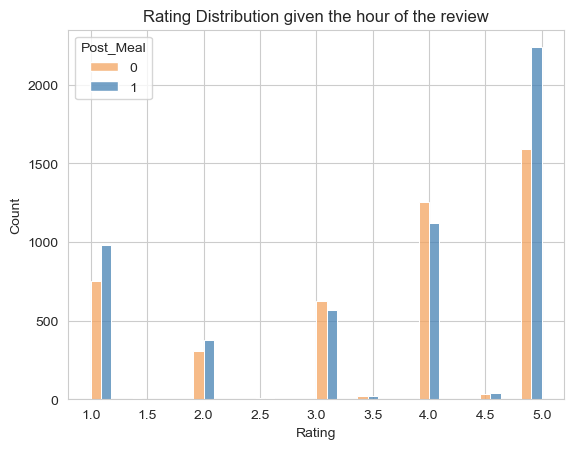

In [54]:
sns.histplot(reviews, 
             x='Rating', 
             hue='Post_Meal', 
             multiple='dodge', 
             palette=['sandybrown','steelblue']).set_title('Rating Distribution given the hour of the review')
plt.show()

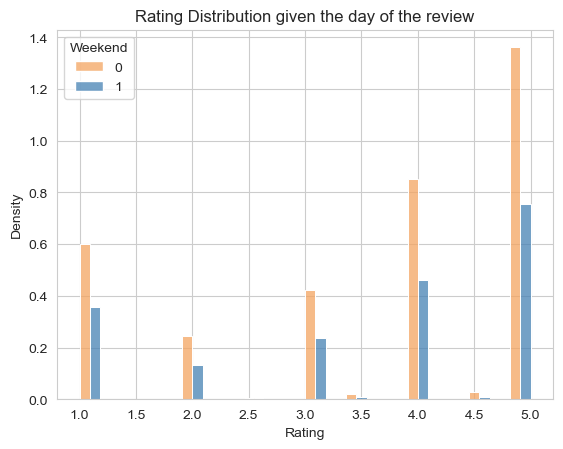

In [66]:
sns.histplot(reviews, 
             x='Rating', 
             hue='Weekend',
             multiple='dodge',
             stat='density',
             palette=['sandybrown','steelblue']).set_title('Rating Distribution given the day of the review')
plt.show()

Das pessoas que enviaram review logo a seguir a refeição, maioria atribuiu rating the 5 (very good, very nice)

See if a reviewer has given more than one review to the same restaurant.

In [152]:
review_counts = reviews.groupby(['Reviewer', 'Restaurant']).agg(
    mean_rating=('Rating','mean'),
    review_count=('Rating','count')).sort_values(by='review_count', ascending=False)

review_counts[review_counts['review_count'] > 1]

,,mean_rating,review_count
Reviewer,Restaurant,,
Afreen Jahan,eat.fit,3.833333,6
Malar Madhav Rao,Domino's Pizza,1.250000,4
Rahul Nayak,Amul,5.000000,4
Rahul Jaiswal,Pakwaan Grand,2.750000,4
Prite,Being Hungry,5.000000,4
...,...,...,...
Rakesh Raja,Being Hungry,5.000000,2
Ramyasree A,Hunger Maggi Point,2.500000,2
Yugandhar,Cream Stone,4.000000,2


In [ ]:
reviews["preproc_content"] =\
      reviews["Review"].map(lambda content : Graphs.main_pipeline(content,
                                                                                    print_output=False,
                                                                                    no_stopwords=True,
                                                                                    lowercase=True,
                                                                                    lemmatized=True,
                                                                                    no_punctuation=True
                                                                                    
                                                                                    ))

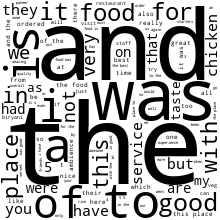

In [62]:
generate_bow_wordcloud(reviews, "Review")